In [43]:
#EMA filter

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

def EMAFilter(x, alpha, y_prev):
    return alpha * x + (1-alpha)*y_prev


def EMAFilterResponse(alpha):
    b = [alpha] #nominator
    a = [1, -1+alpha] #denominator
    return b,a

def FindNearest(array, value):
    array = np.asarray(array)
    return (np.abs(array - value)).argmin()

In [44]:
y_prev = 0
alpha = 0.4

fs = 2000
f_c = 500 
w_c = 2 * np.pi * f_c
delta = 4 * (1 - np.cos(w_c) )**2 - 4 * (-2 - 2 * np.cos(w_c))
alpha_1 = ( -2 * (1 - np.cos(w_c)) - np.sqrt( delta ) ) / (2)
alpha_2 = ( -2 * (1 - np.cos(w_c)) + np.sqrt( delta ) ) / (2)

print("$a_1 = " + str(alpha_1));
print("$a_2 = " + str(alpha_2));

alpha = -alpha_2

$a_1 = -2.0
$a_2 = 2.0


In [45]:
b,a = EMAFilterResponse(alpha)
w, h = signal.freqz(b,a,fs=fs)
h = 20 * np.log10(abs(h))

idx = FindNearest(h, -3)
print("cutoff freq = " + str(w[idx]))

cutoff freq = 390.62500000000006


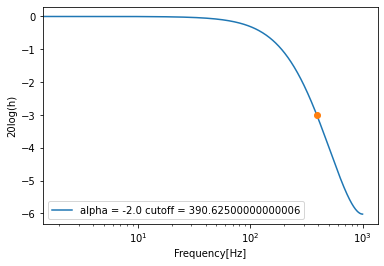

In [46]:
plt.semilogx(w, h, label="alpha = "+ str(alpha) +" cutoff = " + str(w[idx]))
plt.plot(w[idx], h[idx],'o')
plt.xlabel('Frequency[Hz]')
plt.ylabel('20log(h)')
plt.legend()